In [1]:
import os

# Path to your downloaded Sentinel-2 folder
base_path = r"C:\Users\adamh\Desktop\Satelite_images\S2C_MSIL1C_20251021T105111_N0511_R051_T31UDQ_20251021T125048.SAFE"

# Walk through directory tree and print all files
for root, dirs, files in os.walk(base_path):
    level = root.replace(base_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")


S2C_MSIL1C_20251021T105111_N0511_R051_T31UDQ_20251021T125048.SAFE/
  INSPIRE.xml
  manifest.safe
  MTD_MSIL1C.xml
  S2C_MSIL1C_20251021T105111_N0511_R051_T31UDQ_20251021T125048-ql.jpg
  DATASTRIP/
    DS_2CPS_20251021T125048_S20251021T105113/
      MTD_DS.xml
      QI_DATA/
        FORMAT_CORRECTNESS.xml
        GENERAL_QUALITY.xml
        GEOMETRIC_QUALITY.xml
        RADIOMETRIC_QUALITY.xml
        SENSOR_QUALITY.xml
  GRANULE/
    L1C_T31UDQ_A005884_20251021T105113/
      MTD_TL.xml
      AUX_DATA/
        AUX_CAMSFO
        AUX_ECMWFT
      IMG_DATA/
        T31UDQ_20251021T105111_B01.jp2
        T31UDQ_20251021T105111_B02.jp2
        T31UDQ_20251021T105111_B03.jp2
        T31UDQ_20251021T105111_B04.jp2
        T31UDQ_20251021T105111_B05.jp2
        T31UDQ_20251021T105111_B06.jp2
        T31UDQ_20251021T105111_B07.jp2
        T31UDQ_20251021T105111_B08.jp2
        T31UDQ_20251021T105111_B09.jp2
        T31UDQ_20251021T105111_B10.jp2
        T31UDQ_20251021T105111_B11.jp2
        T3

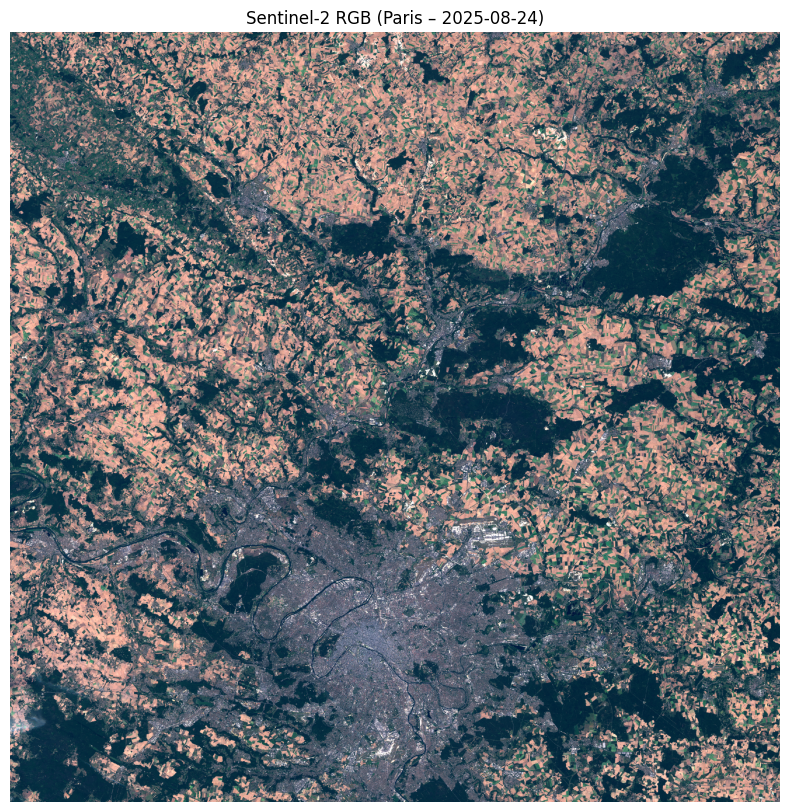

In [5]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Base path ---
base = r"C:\Users\adamh\Desktop\Satelite_images\S2A_MSIL1C_20250824T104651_N0511_R051_T31UDQ_20250824T132306.SAFE\GRANULE"
granule = [d for d in os.listdir(base) if d.startswith("L1C_T31UDQ")][0]
img_dir = os.path.join(base, granule, "IMG_DATA")

# --- Band paths ---
b_red   = os.path.join(img_dir, "T31UDQ_20250824T104651_B04.jp2")
b_green = os.path.join(img_dir, "T31UDQ_20250824T104651_B03.jp2")
b_blue  = os.path.join(img_dir, "T31UDQ_20250824T104651_B02.jp2")

# --- Read downsampled (to avoid memory issues) ---
scale = 0.2   # 20 % of full size → ≈2 k×2 k image
def read_band(path):
    with rasterio.open(path) as src:
        out_shape = (int(src.height * scale), int(src.width * scale))
        return src.read(1, out_shape=out_shape).astype(np.float32)

red, green, blue = [read_band(p) for p in (b_red, b_green, b_blue)]

# --- Stack + stretch ---
rgb = np.dstack((red, green, blue))
rgb_min, rgb_max = np.percentile(rgb, (1, 99))
rgb_scaled = np.clip((rgb - rgb_min) / (rgb_max - rgb_min), 0, 1)

# --- Plot ---
plt.figure(figsize=(10, 10))
plt.imshow(rgb_scaled)
plt.title("Sentinel-2 RGB (Paris – 2025-08-24)")
plt.axis("off")
plt.show()


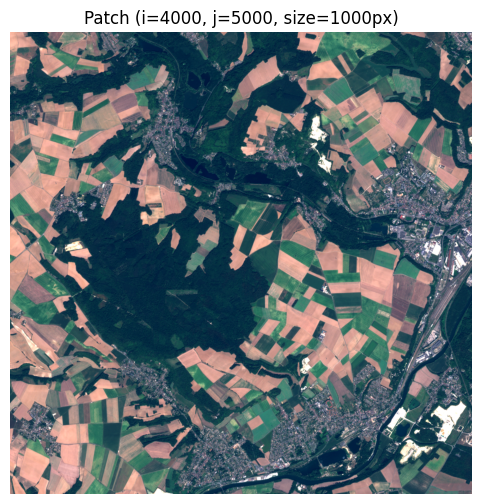

In [6]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Base paths (same as your current image) ---
base = r"C:\Users\adamh\Desktop\Satelite_images\S2A_MSIL1C_20250824T104651_N0511_R051_T31UDQ_20250824T132306.SAFE\GRANULE"
granule = [d for d in os.listdir(base) if d.startswith("L1C_T31UDQ")][0]
img_dir = os.path.join(base, granule, "IMG_DATA")

# --- Band paths ---
b_red   = os.path.join(img_dir, "T31UDQ_20250824T104651_B04.jp2")
b_green = os.path.join(img_dir, "T31UDQ_20250824T104651_B03.jp2")
b_blue  = os.path.join(img_dir, "T31UDQ_20250824T104651_B02.jp2")

# --- Function to plot a patch ---
def plot_patch(i, j, patch_size):
    """Display a cropped RGB patch of the Sentinel-2 image.
    (i, j) are the upper-left pixel coordinates, patch_size in pixels.
    """
    with rasterio.open(b_red) as r:
        red = r.read(1, window=rasterio.windows.Window(j, i, patch_size, patch_size)).astype(np.float32)
    with rasterio.open(b_green) as g:
        green = g.read(1, window=rasterio.windows.Window(j, i, patch_size, patch_size)).astype(np.float32)
    with rasterio.open(b_blue) as b:
        blue = b.read(1, window=rasterio.windows.Window(j, i, patch_size, patch_size)).astype(np.float32)

    rgb = np.dstack((red, green, blue))
    rgb_min, rgb_max = np.percentile(rgb, (1, 99))
    rgb_scaled = np.clip((rgb - rgb_min) / (rgb_max - rgb_min), 0, 1)

    plt.figure(figsize=(6,6))
    plt.imshow(rgb_scaled)
    plt.title(f"Patch (i={i}, j={j}, size={patch_size}px)")
    plt.axis("off")
    plt.show()

# Example: show a 1000×1000 patch starting at pixel (4000, 5000)
plot_patch(i=4000, j=5000, patch_size=1000)


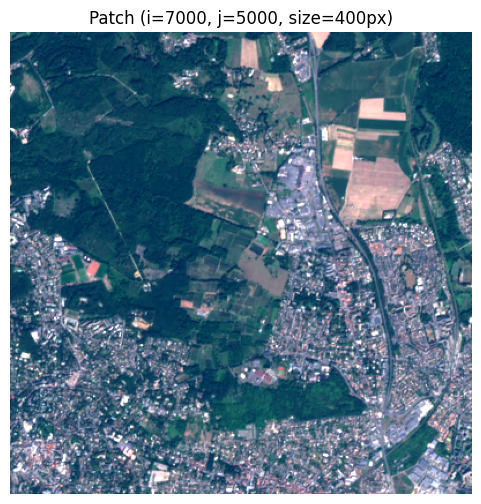

In [10]:
plot_patch(i=7000, j=5000, patch_size=400)